In [32]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [33]:
crypto_Main_df = pd.read_csv(Path('crypto_data.csv'))

In [34]:
crypto_Main_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [35]:
crypto_Main_df['IsTrading'].unique()

array([ True, False])

In [36]:
crypto_df=crypto_Main_df.loc[crypto_Main_df['IsTrading']==True]

In [37]:
crypto_df=crypto_df.drop('IsTrading', axis=1)

In [38]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [39]:
crypto_df=crypto_df.dropna(how='any')

In [40]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [41]:
crypto_df=crypto_df.loc[crypto_df['TotalCoinsMined']>0]

In [42]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [45]:
CoinName=pd.DataFrame(crypto_df['CoinName']).reset_index(drop=True)

In [46]:
crypto_df=crypto_df.drop(['CoinName','Unnamed: 0'],axis=1)

In [47]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [48]:
X=pd.get_dummies(crypto_df,columns=['Algorithm', 'ProofType'])

In [49]:
X.shape

(532, 98)

In [50]:
# Standarize dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

# Dimensionality Reduction

In [51]:
pca=PCA(n_components=0.90) 
crypto_pca=pca.fit_transform(crypto_scaled)

In [52]:
crypto_pca.shape

(532, 74)

# t-SNE 

In [53]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

In [54]:
tsne_features.shape

(532, 2)

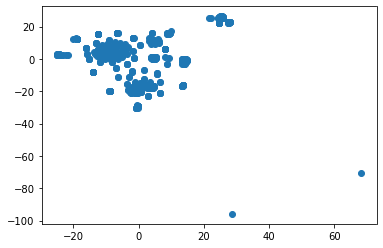

In [55]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Cluster Analysis with k-Means

In [56]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\lekpi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,203864.781250
1,2,124479.468750
2,3,67236.523438
3,4,43883.761719
4,5,31223.917969
5,6,25083.835938
6,7,20230.171875
7,8,17255.585938
8,9,14542.227539
9,10,12595.575195


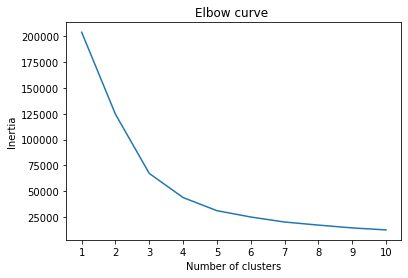

In [57]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve ')
plt.show()

# The graph is almost steady after the K value reaches around 4. cryptocurrencies can be clustered together into 4 distinct groups.

Predicting clusters with k=4

In [58]:
New_df = pd.DataFrame(tsne_features).reset_index(drop=True)
New_df.head()

,0,1
0,4.767822,-17.238583
1,-2.558323,-20.577888
2,-0.505327,-28.513763
3,25.200939,26.401028
4,-12.496385,15.214013


In [59]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(New_df)

# Predict clusters
predictions = model.predict(New_df)

# Create return DataFrame with predicted clusters
New_df["class"] = model.labels_
New_df.head()

,0,1,class
0,4.767822,-17.238583,2
1,-2.558323,-20.577888,2
2,-0.505327,-28.513763,2
3,25.200939,26.401028,1
4,-12.496385,15.214013,0


In [60]:
New_df['class'].value_counts()

0    198
2    148
3    137
1     49
Name: class, dtype: int64

In [61]:
CryptoCluster_df=pd.concat([CoinName, New_df],axis=1, sort=False)

In [63]:
CryptoCluster_df.head()

,CoinName,0,1,class
0,42 Coin,4.767822,-17.238583,2
1,404Coin,-2.558323,-20.577888,2
2,EliteCoin,-0.505327,-28.513763,2
3,Bitcoin,25.200939,26.401028,1
4,Ethereum,-12.496385,15.214013,0


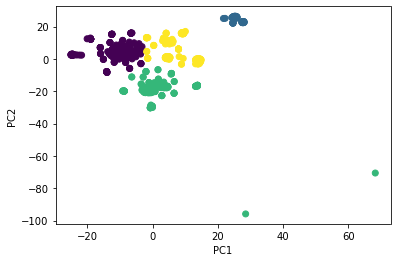

In [62]:
# Visualize the clusters
plt.scatter(New_df[0], New_df[1], c=New_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()